## <center>Scrits to generate all figures in r2d4 manuscript</center>


In [6]:
%matplotlib inline
import scipy
import pdb

from pylab import *
import scipy.cluster.hierarchy as sch
import numpy as np

import fnmatch
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import glob
from scipy.spatial.distance import pdist
from scipy.cluster.hierarchy import fcluster
from matplotlib.colors import rgb2hex, colorConverter
from scipy.spatial import distance
from scipy import signal
import pdb
import matplotlib.ticker as ticker

sns.set_context(context='paper', font_scale=2.0)
# this is the setting you want
sns.set_style("white", {'axes.linewidth':0.0000001, 'axes.edgecolor':'white'})

## Fig.B Representative reaction time plot showing improvement by block  

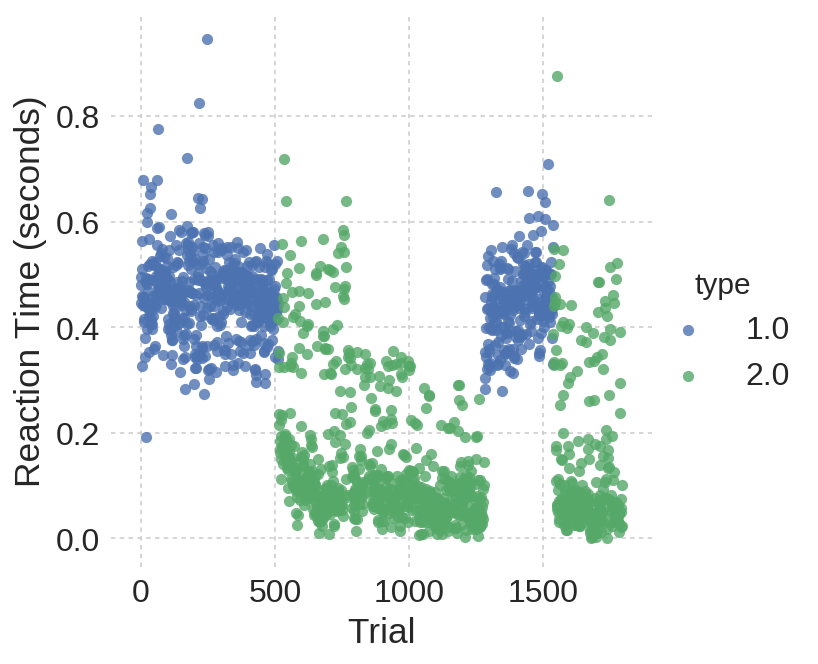

In [54]:

data_out = pd.read_csv('/home/beukema2/Dropbox/r2d4/behavior/0491_allResp_r2d4_behavior_2015_Aug_14_1028_Day_12.csv')
lag_names = ['lag' + str(i) for i in  range(1,32)]
data_lags = pd.DataFrame(columns = lag_names)
sum_names = ['block', 'accuracy', 'rt_all', 'rt_cor', 'sdAcc', 'sdRT']
data_summary = pd.DataFrame(columns = (sum_names))
skip_index = 32
max_lags = 31
for i in np.unique(data_out[['block']]):
    #make a plot of the response times vs trial and plot by type save with subject's id.
    data_out['trial'] = np.array(range(1,len(data_out)+1))
    if i ==6:
        ax = sns.lmplot('trial', 'rt', hue = 'type', data=data_out, fit_reg=False)
        plt.grid(linestyle='dotted')
        plt.ylabel('Reaction Time (seconds)')
        plt.xlabel('Trial')
      

        plt.savefig('/home/beukema2/Dropbox/r2d4/finalfigures/Figure2/representative_rts.svg')

## Generate summary dataFrames for the reaction time plots in Figure 1 panel C and D

In [77]:
#Create dataframes for z scored reactionTimes
def initialize_dfs():
    index = range(0,25)
    df_ = pd.DataFrame(index=index)
    df_.index.name = 'Day'
    df_ = df_.fillna(np.nan) # with 0s rather than NaNs

    dfrts = pd.DataFrame(index=index)
    dfrts = dfrts.fillna(np.nan) # with 0s rather than NaNs
    dfrts.index.name = 'Day'
    return df_, dfrts, dfrts.index.name, index 

def analyzeRts(subjectDir, group):
 
    #Find files matching
    summary_files = []
    for file in os.listdir(subjectDir):
        if fnmatch.fnmatch(file, '*summary_*Day_*.csv'):
            summary_files.append(os.path.realpath(os.path.join(subjectDir,file)))

    k=1
    for file in summary_files:
        df = pd.read_csv(file)
        base=os.path.basename(file)
        daytemp = os.path.splitext(base)[0]
        day = int(daytemp[48:])
        subject = subjectDir[-4:]
        dfrts.loc[day-1, subject] = (df['rt_all'][5] - df['rt_all'][6])/df['sdRT'][5]
        dfrts.to_csv('/home/beukema2/Dropbox/r2d4/finalfigures/Figure1/' + group +'_reactionZscores.csv')                                                                                                                                        
   
df_, dfrts, dfrts.index.name, index  = initialize_dfs()   
for root, dirs, files in os.walk('/home/beukema2/Dropbox/r2d4/acfTest/sequence/'):
    analyzeRts(root, 'sequence')
df_, dfrts, dfrts.index.name, index  = initialize_dfs()   
for root, dirs, files in os.walk('/home/beukema2/Dropbox/r2d4/acfTest/control/'):
    analyzeRts(root, 'control')    

#Create dataframes raw reaction times

def initialize_dfs():
    index = range(0,25)
    df_ = pd.DataFrame(index=index)
    df_.index.name = 'Day'
    df_ = df_.fillna(np.nan) # with 0s rather than NaNs

    dfrts_block6 = pd.DataFrame(index=index)
    dfrts_block6 = dfrts_block6.fillna(np.nan) # with 0s rather than NaNs
    dfrts_block6.index.name = 'Day'
    dfrts_block7 = pd.DataFrame(index=index)
    dfrts_block7 = dfrts_block7.fillna(np.nan) # with 0s rather than NaNs
    dfrts_block7.index.name = 'Day'
    return df_, dfrts_block6, dfrts_block6.index.name, dfrts_block7, dfrts_block7.index.name, index 

def analyzeRts(subjectDir, group):
    #Find files matching
    summary_files = []
    for file in os.listdir(subjectDir):
        if fnmatch.fnmatch(file, '*summary_*Day_*.csv'):
            summary_files.append(os.path.realpath(os.path.join(subjectDir,file)))
    k=1
    for file in summary_files:
        df = pd.read_csv(file)
        base=os.path.basename(file)
        daytemp = os.path.splitext(base)[0]
        day = int(daytemp[48:])
        subject = subjectDir[-4:]
        dfrts_block6.loc[day-1, subject] =  df['rt_all'][6]
        dfrts_block7.loc[day-1, subject] =  df['rt_all'][5]
        
        dfrts_block6.to_csv('/home/beukema2/Dropbox/r2d4/finalfigures/Figure1/' + group +'_reactionRaw_block6.csv')    
        dfrts_block7.to_csv('/home/beukema2/Dropbox/r2d4/finalfigures/Figure1/' + group +'_reactionRaw_block7.csv')                                                                                                                                                                                                                
   
df_, dfrts_block6, dfrts_block6.index.name, dfrts_block7, dfrts_block7.index.name, index = initialize_dfs()   
for root, dirs, files in os.walk('/home/beukema2/Dropbox/r2d4/acfTest/sequence/'):
    analyzeRts(root, 'sequence')
df_, dfrts_block6, dfrts_block6.index.name, dfrts_block7, dfrts_block7.index.name, index = initialize_dfs()   
for root, dirs, files in os.walk('/home/beukema2/Dropbox/r2d4/acfTest/control/'):
    analyzeRts(root, 'control')    

## Fig 1.C: Raw Reaction Times

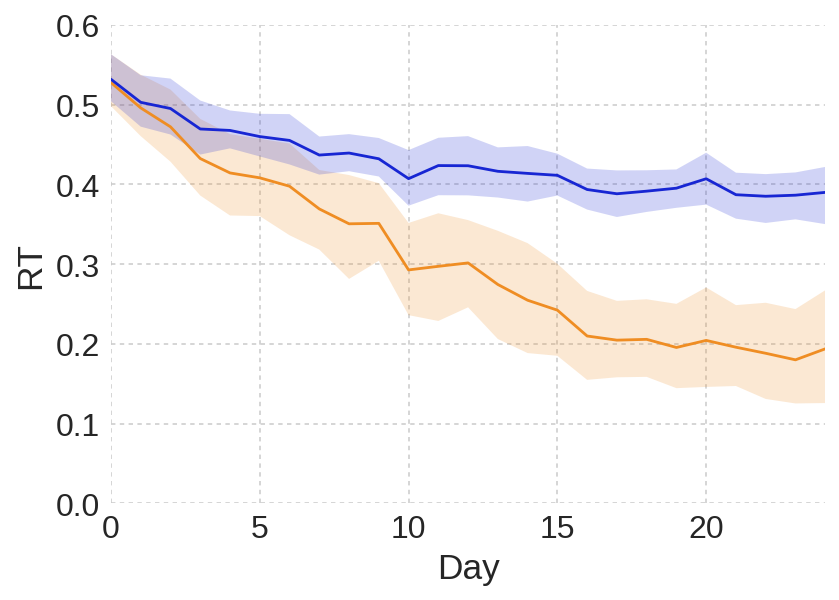

In [79]:
df = pd.read_csv(os.path.expanduser('/home/beukema2/Dropbox/r2d4/finalfigures/Figure1/sequence_reactionRaw_block6.csv'))
df = pd.melt(df, id_vars=["Day"], var_name="subject")
df['Group'] = np.array('sequence')
df2 = pd.read_csv(os.path.expanduser('/home/beukema2/Dropbox/r2d4/finalfigures/Figure1/sequence_reactionRaw_block7.csv'))
df2 = pd.melt(df2, id_vars=["Day"], var_name="subject")
df2['Group'] = np.array('random')
bigdata=df.append(df2,ignore_index = True)
ax = sns.tsplot(data=bigdata, time="Day", unit="subject",ci=95, value="value", condition="Group",estimator=np.nanmean, interpolate = True, color=['#ef8d23', '#1726d3'])
ax.set(xlabel='Day', ylabel='RT')
ax.set(ylim=(0, .6))
ax.legend_.remove()
plt.grid(linestyle='dotted')
plt.savefig(os.path.expanduser('~/Dropbox/r2d4/finalfigures/Figure2/sequence_raw.svg'))

## Fig 1.C: Raw Reaction Times

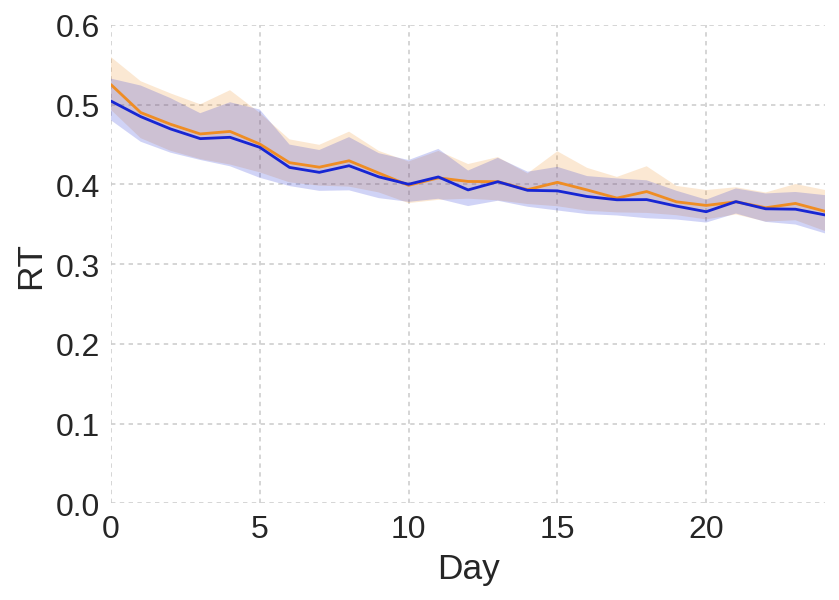

In [80]:
df = pd.read_csv(os.path.expanduser('/home/beukema2/Dropbox/r2d4/finalfigures/Figure1/control_reactionRaw_block6.csv'))
df = pd.melt(df, id_vars=["Day"], var_name="subject")
df['Group'] = np.array('sequence')
df2 = pd.read_csv(os.path.expanduser('/home/beukema2/Dropbox/r2d4/finalfigures/Figure1/control_reactionRaw_block7.csv'))
df2 = pd.melt(df2, id_vars=["Day"], var_name="subject")
df2['Group'] = np.array('random')
bigdata=df.append(df2,ignore_index = True)
ax = sns.tsplot(data=bigdata, time="Day", unit="subject",ci=95, value="value", condition="Group",estimator=np.nanmean, interpolate = True, color=['#ef8d23', '#1726d3'])
ax.set(xlabel='Day', ylabel='RT')
ax.set(ylim=(0, .6))
ax.legend_.remove()
plt.grid(linestyle='dotted')
plt.savefig(os.path.expanduser('~/Dropbox/r2d4/finalfigures/Figure2/control_raw.svg'))

## Fig 1.D: Reaction Time Improvement (z scores)


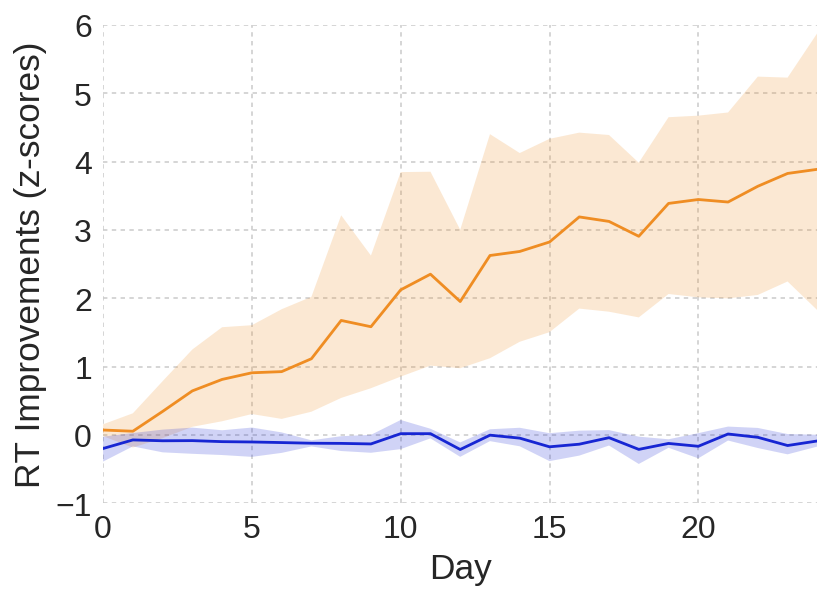

In [65]:
df = pd.read_csv(os.path.expanduser('/home/beukema2/Dropbox/r2d4/finalfigures/Figure1/sequence_reactionZscores.csv'))
df = pd.melt(df, id_vars=["Day"], var_name="subject")
df['Group'] = np.array('sequence')
df2 = pd.read_csv(os.path.expanduser('/home/beukema2/Dropbox/r2d4/finalfigures/Figure1/control_reactionZscores.csv'))
df2 = pd.melt(df2, id_vars=["Day"], var_name="subject")
df2['Group'] = np.array('random')
bigdata=df.append(df2,ignore_index = True)
ax = sns.tsplot(data=bigdata, time="Day", unit="subject",ci=95, value="value", condition="Group",estimator=np.nanmean, interpolate = True, color=['#ef8d23', '#1726d3'])
ax.set(xlabel='Day', ylabel='RT Improvements (z-scores)')
ax.set(ylim=(-1, 6))
ax.legend_.remove()
plt.grid(linestyle='dotted')
plt.savefig(os.path.expanduser('~/Dropbox/r2d4/finalfigures/Figure2/reactionTimes.svg'))

## Fig 1.E: Accuracy 

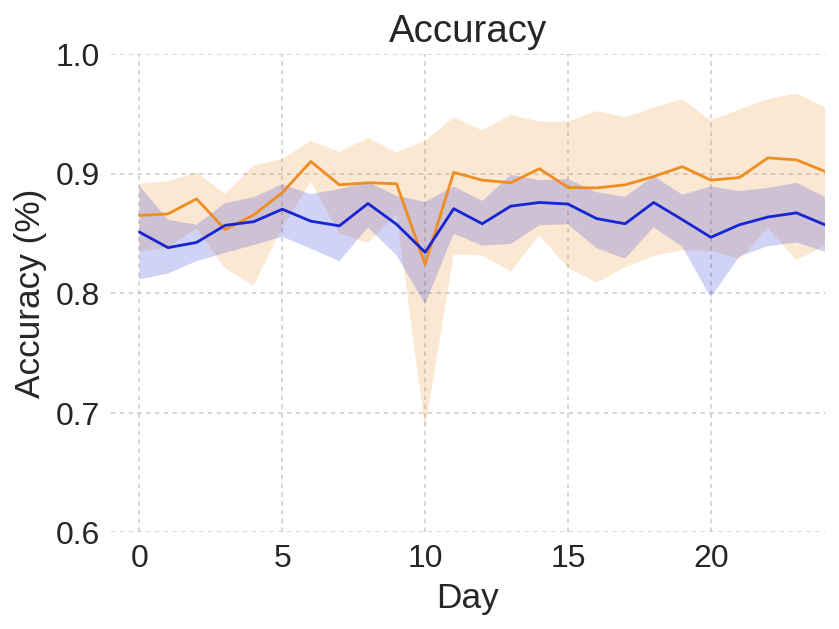

In [22]:
def initialize_dfs():
    index = range(0,25)
    df_ = pd.DataFrame(index=index)
    df_.index.name = 'Day'
    df_ = df_.fillna(np.nan) # with 0s rather than NaNs

    dfrts = pd.DataFrame(index=index)
    dfrts = dfrts.fillna(np.nan) # with 0s rather than NaNs
    dfrts.index.name = 'Day'
    return dfrts, df_

def getAccuracy(subjectDir, group):
    #Find files matching
    summary_files = []
    for file in os.listdir(subjectDir):
        if fnmatch.fnmatch(file, '*summary_*Day_*.csv'):
            summary_files.append(os.path.realpath(os.path.join(subjectDir,file)))
    
    k=1
    for file in summary_files:
        df = pd.read_csv(file)
        base=os.path.basename(file)
        daytemp = os.path.splitext(base)[0]
        day = int(daytemp[48:])
        subject = subjectDir[-4:]
        dfrts.loc[day-1, subject] = df['accuracy'][6]
        dfrts.to_csv('/home/beukema2/Dropbox/r2d4/finalfigures/Figure1/' + group +'accuracy.csv')  
        
dfrts, df_ = initialize_dfs()   
for root, dirs, files in os.walk('/home/beukema2/Dropbox/r2d4/acfTest/control/'):
    getAccuracy(root,  'control')
dfrts, df_ = initialize_dfs()      
for root, dirs, files in os.walk('/home/beukema2/Dropbox/r2d4/acfTest/sequence/'):
    getAccuracy(root, 'sequence')
    
df = pd.read_csv('/home/beukema2/Dropbox/r2d4/finalfigures/Figure1/sequenceaccuracy.csv')
df = pd.melt(df, id_vars=["Day"], var_name="subject")
df['Group'] = np.array('sequence')
    
df2 = pd.read_csv('/home/beukema2/Dropbox/r2d4/finalfigures/Figure1/controlaccuracy.csv')
df2 = pd.melt(df2, id_vars=["Day"], var_name="subject")
df2['Group'] = np.array('random')

bigdata=df.append(df2,ignore_index = True)
ax = sns.tsplot(data=bigdata, time="Day", unit="subject", value="value", condition="Group",estimator=np.nanmean, interpolate = True, color=['#ef8d23', '#1726d3'], err_style='ci_band', ci=95)
ax.set(xlabel='Day', ylabel='Accuracy (%)')

ax.set(ylim=(0.6,1))
ax.set(xlim=(-1,24))
ax.legend_.remove()
plt.grid(linestyle='dotted')
plt.savefig(os.path.expanduser('~/Dropbox/r2d4/finalfigures/Figure2/accuracy.svg'))

## Figure 2 B True Distance Matrix </center>

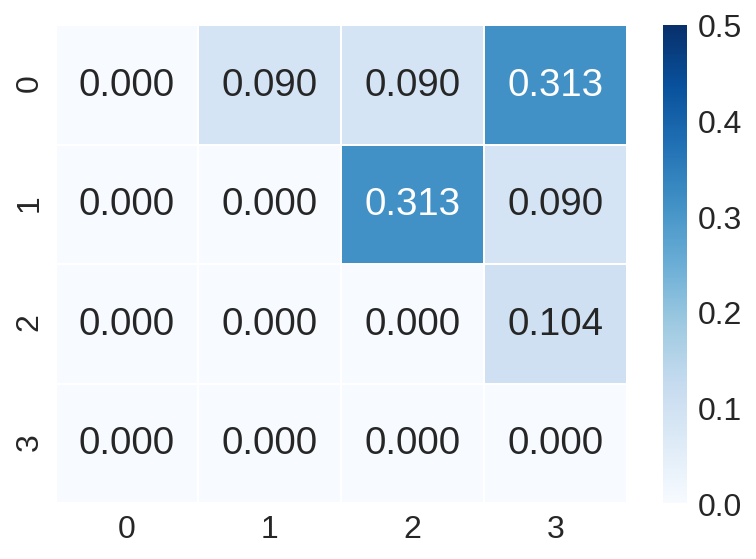

In [69]:
# sequence_stims = [4,5,3,4,2,5,3,2,4,5,4,5,2,4,5,3,2,3,5,3,4,2,3,2,3,5,4,2,4,2,3,5]
fig = plt.figure(figsize=(8,8))
trueDistances = np.array([[0, 0.0896, 0.0896, 0.3134],[0,0,0.3134,0.0896], [0,0,0,0.1045], [0,0,0,0]])
trueD = sns.heatmap(trueDistances, annot=True, fmt='.3f', linewidths=.5, cmap = plt.cm.Blues, vmin=0, vmax=.5)
fig.savefig(os.path.expanduser('/home/beukema2/Dropbox/r2d4/finalfigures/Figure3/trueDistanceMatrix.svg'))                                                                                                                                           


## Generate the lags for the autocorrelation figures in Panel C and D of Figure 2

In [ ]:
index = range(0,32)

df_ = pd.DataFrame(index=index)
df_.index.name = 'Day'
df_ = df_.fillna(np.nan) # with 0s rather than NaNs

def genLags(subjectDir, group):
    if group == 'control':
        columns = ['0269','0464', '0494', '0495','0549', '0550', '0604', '0605', '0627']
    if group == 'sequence':
        columns = ['0006','0012', '0192', '0273','0490', '0491', '0557', '0558', '0559']

    #Find files matching
    summary_files = []
    for file in os.listdir(subjectDir):
        if fnmatch.fnmatch(file, '*summary_*Day_*.csv'):
            summary_files.append(os.path.realpath(os.path.join(subjectDir,file)))

    k=1
    lag_names = ['lag' + str(i) for i in  range(1,32)]
    cols = ['lag' + str(i) for i in  range(1,32)]
    cols.append('day')
    cols.append('subject')
    seqLags = pd.DataFrame(columns = cols)
    
    for file in summary_files:
        print file
        df = pd.read_csv(file)
        base=os.path.basename(file)
        daytemp = os.path.splitext(base)[0]
        day = int(daytemp[48:])
        subject = subjectDir[-4:]
                                                                                                                                         
        seqLags.loc[day] = df[lag_names].loc[6]
        seqLags.loc[day, ['day']] = day
        seqLags.loc[day, ['subject']] = subject  
        seqLags.to_csv(subject+'lags.csv')
        
    

for root, dirs, files in os.walk('/Users/plb/Dropbox/r2d4/acfTest/control/'):
    genLags(root,  'control')
    
for root, dirs, files in os.walk('/Users/plb/Dropbox/r2d4/acfTest/sequence/'):
    genLags(root, 'sequence')
  


## Figure 3: PanelsC&D

/home/beukema2/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:26: FutureWarning: convert_objects is deprecated.  Use the data-type specific converters pd.to_datetime, pd.to_timedelta and pd.to_numeric.
/home/beukema2/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:62: FutureWarning: convert_objects is deprecated.  Use the data-type specific converters pd.to_datetime, pd.to_timedelta and pd.to_numeric.


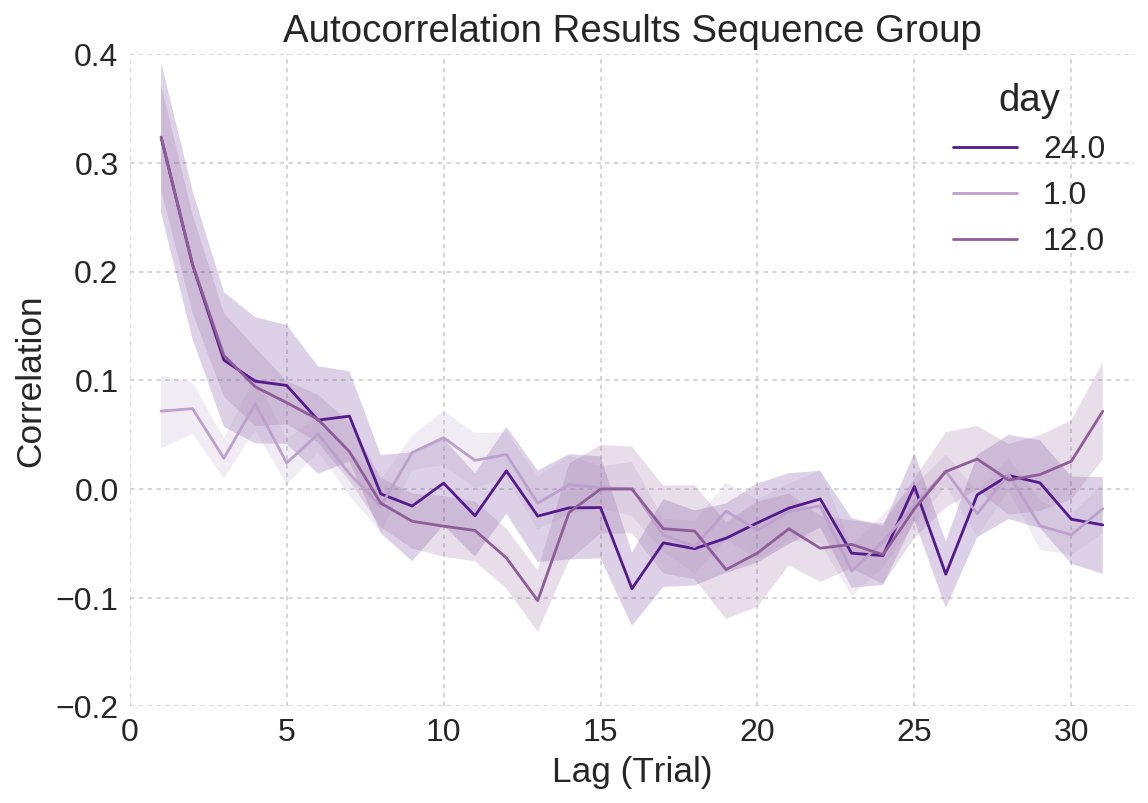

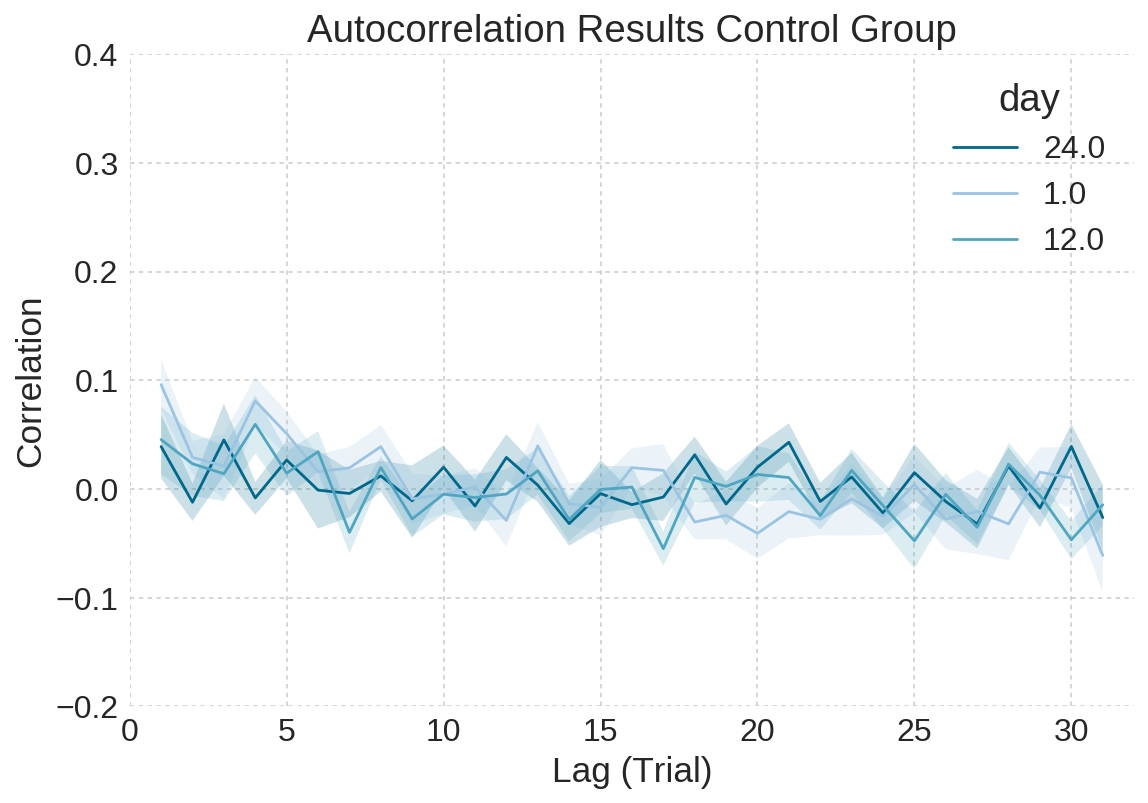

In [57]:
df1 = pd.read_csv(os.path.expanduser('~/Dropbox/r2d4/acfTest/0006lags.csv'))
df2 = pd.read_csv(os.path.expanduser('~/Dropbox/r2d4/acfTest/0012lags.csv'))
df3 = pd.read_csv(os.path.expanduser('~/Dropbox/r2d4/acfTest/0192lags.csv'))
df4 = pd.read_csv(os.path.expanduser('~/Dropbox/r2d4/acfTest/0273lags.csv'))
df5 = pd.read_csv(os.path.expanduser('~/Dropbox/r2d4/acfTest/0490lags.csv'))
df6 = pd.read_csv(os.path.expanduser('~/Dropbox/r2d4/acfTest/0491lags.csv'))
df7 = pd.read_csv(os.path.expanduser('~/Dropbox/r2d4/acfTest/0557lags.csv'))
df8 = pd.read_csv(os.path.expanduser('~/Dropbox/r2d4/acfTest/0558lags.csv'))
df9 = pd.read_csv(os.path.expanduser('~/Dropbox/r2d4/acfTest/0559lags.csv'))
df1 = df1.append(df2)
df1 = df1.append(df3)
df1 = df1.append(df4)
df1 = df1.append(df5)
df1 = df1.append(df6)
df1 = df1.append(df7)
df1 = df1.append(df8)
df1 = df1.append(df9)
lag_names = ['lag' + str(i) for i in  range(1,32)]
df = pd.melt(df1, id_vars=["day", 'subject'], value_vars = lag_names)
df['Group'] = np.array('sequence')
df['variable'] = df['variable'].map(lambda x: x.lstrip('lag').rstrip('aAbBcC'))
df = df[(df.day == 1) | (df.day == 12) | (df.day == 24)]
df.to_csv(os.path.expanduser('~/Dropbox/test.csv'))
fig = plt.figure(figsize=(9,6))
colordict = {1:'#BDA0CB', 12:'#8F5E99', 24:'#551A8B'}
df = df.convert_objects(convert_numeric=True)
ax = sns.tsplot(time='variable', value='value',unit='subject', \
                condition="day",data=df,interpolate=True, 
                color =colordict, ci=68)
ax.set(xlabel='Lag (Trial)', ylabel='Correlation')
#     ax.set(title= 'Distance changes by group')
ax.set(xlim=(0, 32))
ax.set(ylim=(-.2, .4))
ax.set_title('Autocorrelation Results Sequence Group')
plt.grid(linestyle='dotted')
fig.savefig('/home/beukema2/Dropbox/r2d4/finalfigures/Figure2/sequence_autocorr.svg')                                                                                                                                           

df1 = pd.read_csv(os.path.expanduser('~/Dropbox/r2d4/acfTest/0269lags.csv'))
df2 = pd.read_csv(os.path.expanduser('~/Dropbox/r2d4/acfTest/0464lags.csv'))
df3 = pd.read_csv(os.path.expanduser('~/Dropbox/r2d4/acfTest/0494lags.csv'))
df4 = pd.read_csv(os.path.expanduser('~/Dropbox/r2d4/acfTest/0495lags.csv'))
df5 = pd.read_csv(os.path.expanduser('~/Dropbox/r2d4/acfTest/0549lags.csv'))
df6 = pd.read_csv(os.path.expanduser('~/Dropbox/r2d4/acfTest/0550lags.csv'))
df7 = pd.read_csv(os.path.expanduser('~/Dropbox/r2d4/acfTest/0604lags.csv'))
df8 = pd.read_csv(os.path.expanduser('~/Dropbox/r2d4/acfTest/0605lags.csv'))
df9 = pd.read_csv(os.path.expanduser('~/Dropbox/r2d4/acfTest/0627lags.csv'))
df1 = df1.append(df2)
df1 = df1.append(df3)
df1 = df1.append(df4)
df1 = df1.append(df5)
df1 = df1.append(df6)
df1 = df1.append(df7)
df1 = df1.append(df8)
df1 = df1.append(df9)
lag_names = ['lag' + str(i) for i in  range(1,32)]
df = pd.melt(df1, id_vars=["day", 'subject'], value_vars = lag_names )
df['Group'] = np.array('control')
df['variable'] = df['variable'].map(lambda x: x.lstrip('lag').rstrip('aAbBcC'))
df = df[(df.day == 1) | (df.day == 12) | (df.day == 24)]
fig = plt.figure(figsize=(9,6))

colordict = {1:'#9BC4E2', 12:'#50A6C2', 24:'#00688B'}
df = df.convert_objects(convert_numeric=True)
ax = sns.tsplot(time='variable', value='value',unit='subject', \
                condition="day",data=df,interpolate=True, 
                color =colordict, ci=68)
ax.set(xlabel='Lag (Trial)', ylabel='Correlation')
ax.set(xlim=(0, 32))
ax.set(ylim=(-.2,.4))
ax.set_title('Autocorrelation Results Control Group')
plt.grid(linestyle='dotted')
fig.savefig('/home/beukema2/Dropbox/r2d4/finalfigures/Figure3/control_autocorr.svg')                                                                                                                                           


### Figure 2 E,F Plot the raw distances with sequential ordering 

In [59]:
#Create DataFrame for summary cluster statisitcs for each day
#Subject Ids for reference. 
#Consider http://docs.scipy.org/doc/scipy-0.14.0/reference/generated/scipy.spatial.distance.pdist.html
index = range(0,25)
df_ = pd.DataFrame(index=index)
df_.index.name = 'Day'
df_ = df_.fillna(np.nan) # with 0s rather than NaNs
dfMah = pd.DataFrame(index=index)
dfMah = dfMah.fillna(np.nan) # with 0s rather than NaNs
dfMah.index.name = 'Day'
trueDistances = np.array([[0, 0.0896, 0.0896, 0.3134],[0,0,0.3134,0.0896], [0,0,0,0.1045], [0,0,0,0]])
                                                                                                                                   
def buildHierarchy(subjectDir):
  
    #Find files matching
    summary_files = []
    for file in os.listdir(subjectDir):
        if fnmatch.fnmatch(file, 'Day_*.csv'):
            summary_files.append(os.path.realpath(os.path.join(subjectDir,file)))
    k=1
    for file in summary_files:
        base=os.path.basename(file)
        daytemp = os.path.splitext(base)[0]
        day = int(daytemp[4:])
      
        #only plot for first and last day
        fig = plt.figure(figsize=(8,8))
        D = np.genfromtxt(file, delimiter=',')
        # Plot distance matrix.
        axmatrix = fig.add_axes([0.3,0.1,0.6,0.6])
        im = axmatrix.matshow(D, aspect='auto', origin='lower', cmap=plt.cm.Blues_r, vmin=.5,vmax=1.0)
        axmatrix.set_xticks([])
        axmatrix.set_yticks([])
        axmatrix.set_xticks(range(32))
        axmatrix.xaxis.set_label_position('bottom')
        axmatrix.xaxis.tick_bottom()
        axmatrix.xaxis.set_label('Sequence Position')
        plt.xticks(rotation=-90, fontsize=8)
        axcolor = fig.add_axes([0.91,0.1,0.02,0.6])
        plt.colorbar(im, cax=axcolor)

        axmatrix.xaxis.tick_bottom()
        plt.xticks(rotation=90, fontsize=4)
        subject = subjectDir[-4:]
        fn = subjectDir + '/'+ os.path.splitext(base)[0] + '.svg'
        if(day ==1 or day == 24):
            fn = '/home/beukema2/Dropbox/r2d4/finalfigures/Figure2/day_' + str(day) + '.svg'
            fig.savefig(fn)
for root, dirs, files in os.walk(os.path.expanduser('~/Dropbox/r2d4/Covariance_Analysisv4/sequence/average')):
    buildHierarchy(root)

## Figure 3 Panel G: Average distance matrix on day 24


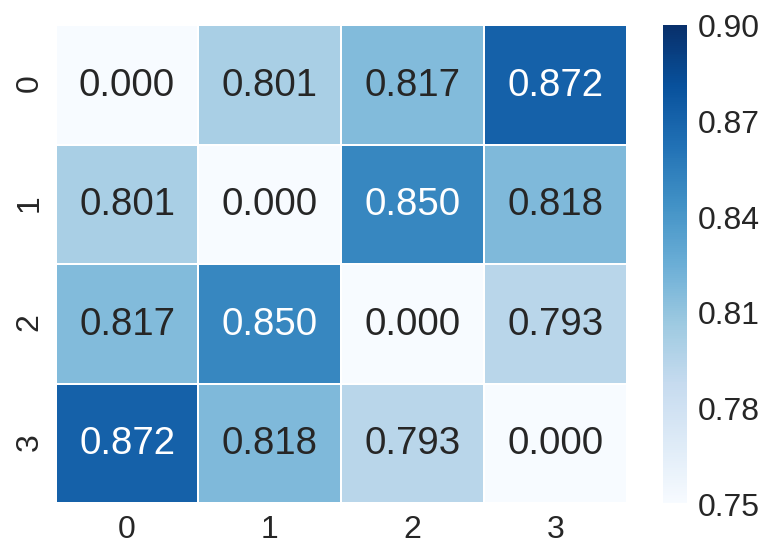

In [159]:
mean_distances = pd.read_csv('/home/beukema2/Dropbox/r2d4/finalfigures/Figure2/mean_distances.csv', header=None)
trueD = sns.heatmap(mean_distances, annot=True, fmt='.3f', linewidths=.5, cmap = plt.cm.Blues, vmin=0.75, vmax=.9)
plt.savefig(os.path.expanduser('/home/beukema2/Dropbox/r2d4/finalfigures/Figure3/group_RDM.svg'))    

In [174]:
iu1 = np.triu_indices(4)
mean_distances.columns = ['index', 'middle', 'ring', 'little']
iu1 = np.triu_indices(4)
these_vals = mean_distances.values
these_vals[iu1] = np.nan
these_vals

array([[    nan,     nan,     nan,     nan],
       [ 0.8012,     nan,     nan,     nan],
       [ 0.8168,  0.8498,     nan,     nan],
       [ 0.8717,  0.8179,  0.7934,     nan]])

## Figure 3H MSE Distance Plots

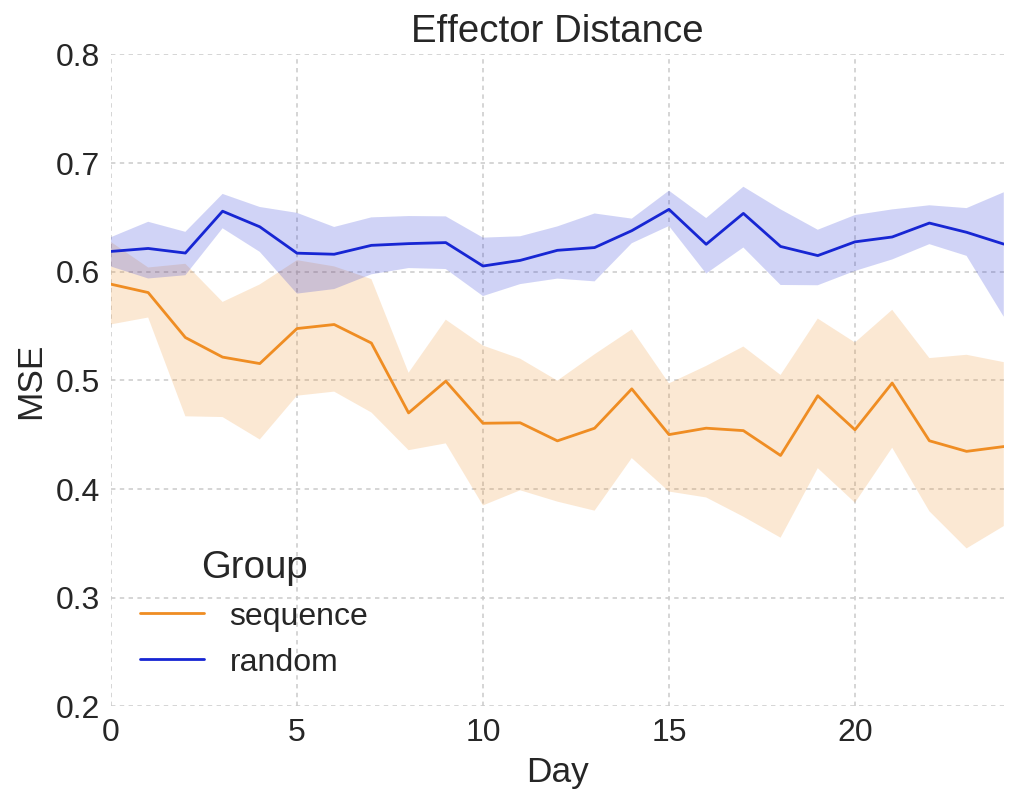

In [60]:
df = pd.read_csv(os.path.expanduser('~/Dropbox/r2d4/finalfigures/Figure2/MSE_Distance_sequence.csv'), header=None)
df['Day']= df.index
df = pd.melt(df,id_vars=["Day"])
df['Group'] = np.array('sequence') 
df2 = pd.read_csv(os.path.expanduser('~/Dropbox/r2d4/finalfigures/Figure2/MSE_Distance_control.csv'), header=None)
df2['Day']= df2.index
df2 = pd.melt(df2,id_vars=["Day"])
df2['Group'] = np.array('random')

bigdata=df.append(df2,ignore_index = True)
plt.figure(figsize=[8,6])
ax = sns.tsplot(data=bigdata, time="Day", unit="variable",ci=95, value="value", condition="Group",estimator=np.nanmean, interpolate = True, color=['#ef8d23', '#1726d3'])
ax.set(xlabel='Day', ylabel='MSE')
ax.set(title= 'Effector Distance')
ax.set(ylim=(0.2, 0.8))
plt.grid(linestyle='dotted')
plt.savefig(os.path.expanduser('~/Dropbox/r2d4/finalfigures/Figure3/effectDistance.svg'))


## Fig. 4: Decoding and Kernel Density estimates

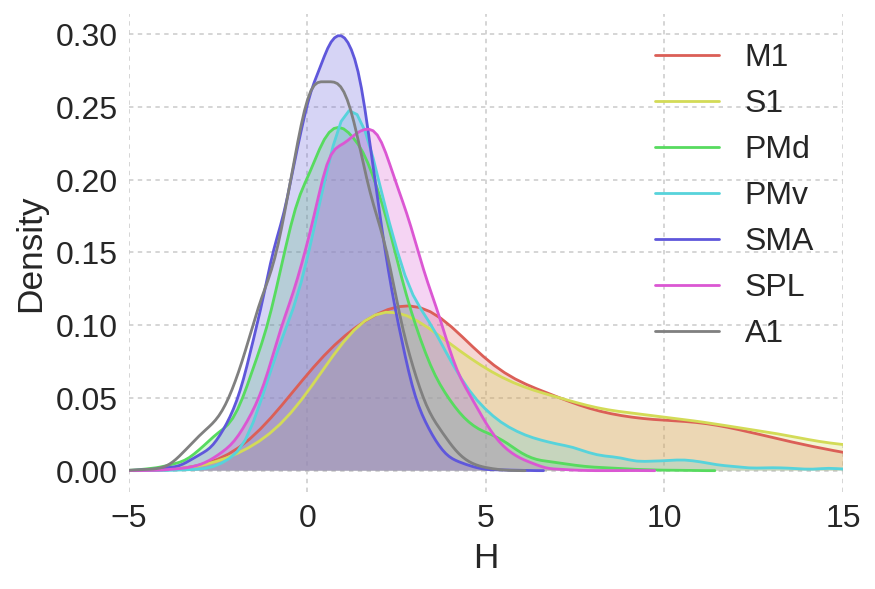

In [11]:
#The kde_roi*.csv files are generated by FigureKDE in /data/r2d4/bin/analysisScripts/

roi_medians = pd.DataFrame()
sns.set_style("white", {'axes.linewidth':0.0001, 'axes.edgecolor':'black'})
sns.set_palette("hls")
df = pd.read_csv('/home/beukema2/Dropbox/r2d4/figures/Figure4/kde_roi_r_lhBA4_cropped.csv', header=None)
roi_medians['M1']= np.nanmedian(df, axis=0)
these_vals = df.values
these_vals= these_vals[~np.isnan(these_vals)]
sns.kdeplot(these_vals, shade=True, label="M1")
df = pd.read_csv('/home/beukema2/Dropbox/r2d4/figures/Figure4/kde_roi_r_lhBA123_cropped.csv', header=None)
roi_medians['S1'] = np.nanmedian(df, axis=0)
these_vals = df.values
these_vals= these_vals[~np.isnan(these_vals)]
sns.kdeplot(these_vals, shade=True, label="S1")
df = pd.read_csv('/home/beukema2/Dropbox/r2d4/figures/Figure4/kde_roi_r_lhBA_pmd.csv', header=None)
roi_medians['PMd'] = np.nanmedian(df, axis=0)
these_vals = df.values
these_vals= these_vals[~np.isnan(these_vals)]
sns.kdeplot(these_vals, shade=True,label="PMd")
df = pd.read_csv('/home/beukema2/Dropbox/r2d4/figures/Figure4/kde_roi_r_lhBA_pmv.csv', header=None)
roi_medians['PMv'] = np.nanmedian(df, axis=0)
these_vals = df.values
these_vals= these_vals[~np.isnan(these_vals)]
sns.kdeplot(these_vals, shade=True, label="PMv")
df = pd.read_csv('/home/beukema2/Dropbox/r2d4/figures/Figure4/kde_roi_r_lhBA_sma.csv', header=None)
roi_medians['SMA'] = np.nanmedian(df, axis=0)
these_vals = df.values
these_vals= these_vals[~np.isnan(these_vals)]
sns.kdeplot(these_vals, shade=True, label="SMA")
df = pd.read_csv('/home/beukema2/Dropbox/r2d4/figures/Figure4/kde_roi_r_l_sup_parietal.csv', header=None)
roi_medians['SPL'] = np.nanmedian(df, axis=0)
these_vals = df.values
these_vals= these_vals[~np.isnan(these_vals)]
sns.kdeplot(these_vals, shade=True,  label="SPL")
df = pd.read_csv('/home/beukema2/Dropbox/r2d4/figures/Figure4/kde_roi_r_A1.csv', header=None)
roi_medians['A1']= np.nanmedian(df, axis=0)
these_vals = df.values
these_vals= these_vals[~np.isnan(these_vals)]
sns.kdeplot(these_vals, color='gray', shade=False, label="A1")
plt.grid(linestyle='dotted')

plt.legend()
plt.xlabel('H')
plt.ylabel('Density')
plt.xlim(-5,15)
plt.savefig('/home/beukema2/Dropbox/r2d4/figures/Figure4/kde_without_errorbars.svg')


/home/beukema2/anaconda/lib/python2.7/site-packages/seaborn/categorical.py:2342: UserWarning: The violinplot API has been changed. Attempting to adjust your arguments for the new API (which might not work). Please update your code. See the version 0.6 release notes for more info.
  warnings.warn(msg, UserWarning)


Ttest_1sampResult(statistic=array([  7.9137,  10.1275,   5.3044,  12.0697,   4.0823,   8.4413,   2.7774]), pvalue=array([  4.2292e-07,   1.2854e-08,   5.8260e-05,   9.2091e-10,
         7.7580e-04,   1.7437e-07,   1.2904e-02]))

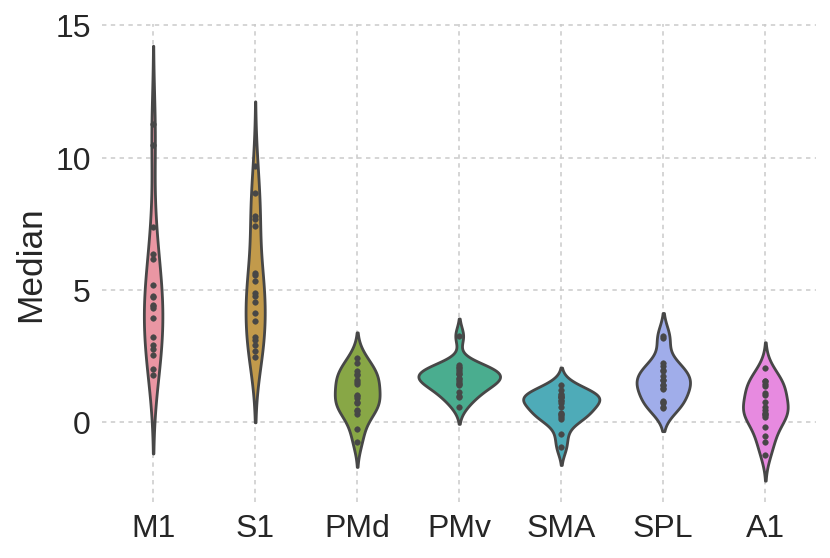

In [12]:
sns.set_palette("hls")
sns.violinplot(roi_medians, inner="points")
plt.grid(linestyle='dotted')
plt.ylabel('Median')
plt.savefig('/home/beukema2/Dropbox/r2d4/figures/Figure4/kde_medians.svg')
scipy.stats.ttest_1samp(roi_medians, 0)

## Figure 5

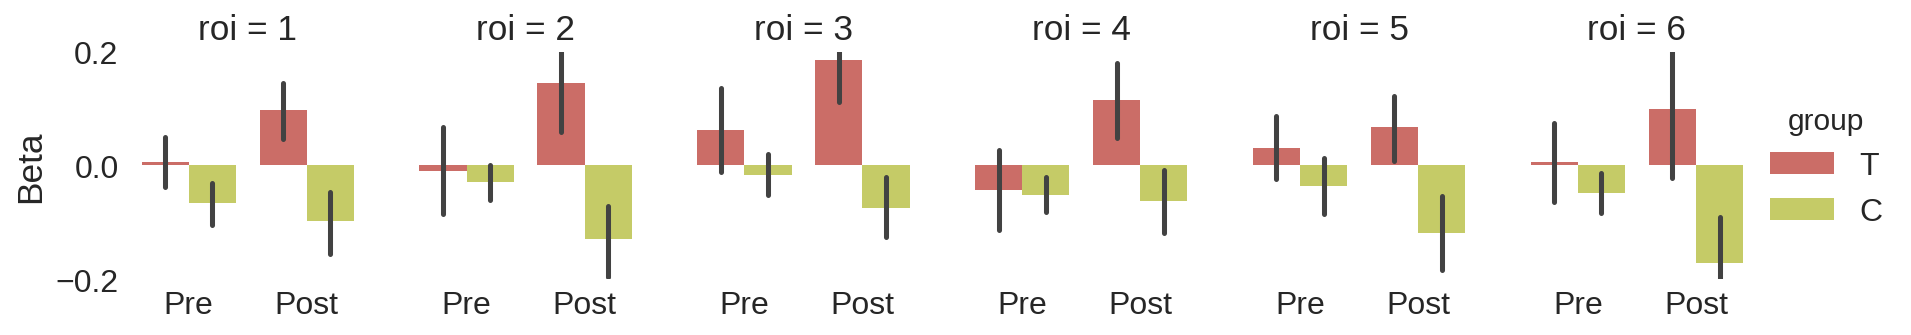

In [21]:
betas = pd.read_csv('/home/beukema2/Dropbox/r2d4/figures/beta_pre_post.csv', header=None)
betas.columns = ['beta','pre_post','group', 'roi', 'reactionTimes']
di = {1:'T', 2:'C'}
betas = betas.replace({'group':di})
colors = {'T': "#ef8d23",'C': "#1726d3"}
g = sns.factorplot(y='beta', x='pre_post',col='roi', hue='group',data=betas,ci=68,  kind="bar", size=3, aspect=.7)
(g.set_axis_labels("", r'Beta').set_xticklabels(["Pre", "Post"]).set(ylim=(-.2, .2)))
plt.savefig('/home/beukema2/Dropbox/r2d4/figures/Figure5/beta_pre_post.svg', format='svg', dpi=1000)


In [23]:
distances = pd.read_csv('/home/beukema2/Dropbox/r2d4/finalfigures/distance_pre_post.csv', header=None)
distances.columns = ['distance','pre_post','group', 'roi', 'reactionTimes']
di = {1:'T', 2:'C'}
distances = distances.replace({'group':di})
colors = {'T': "#ef8d23",'C': "#1726d3"}
g = sns.factorplot(y='distance', x='pre_post',col='roi', hue='group',data=distances,ci=68,  kind="bar", size=3, aspect=.7)
(g.set_axis_labels("", r'Distance').set_xticklabels(["Pre", "Post"]).set(ylim=(-.0, .2)))
plt.grid(linestyle='dotted')
plt.savefig('/home/beukema2/Dropbox/r2d4/figures/final_figures/5/distance_pre_post.svg', format='svg', dpi=1000)


IOError: File /home/beukema2/Dropbox/r2d4/finalfigures/distance_pre_post.csv does not exist

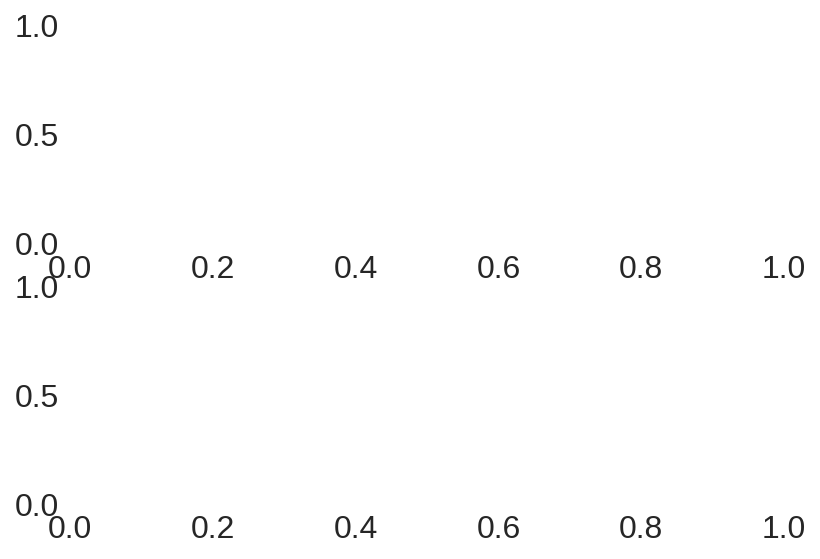

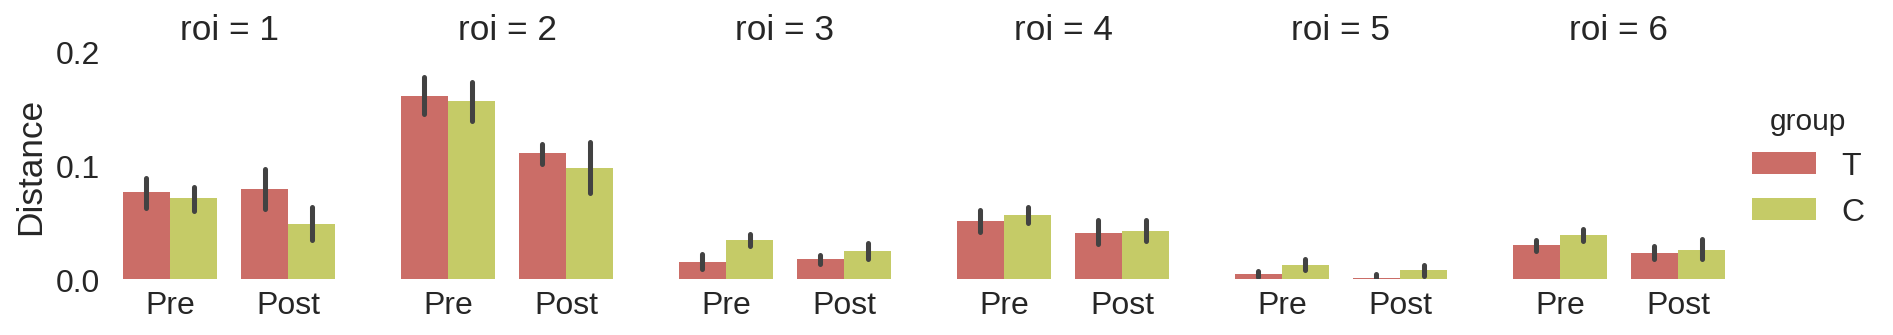

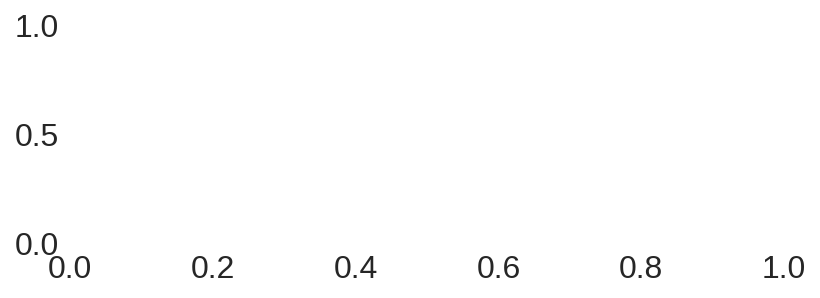

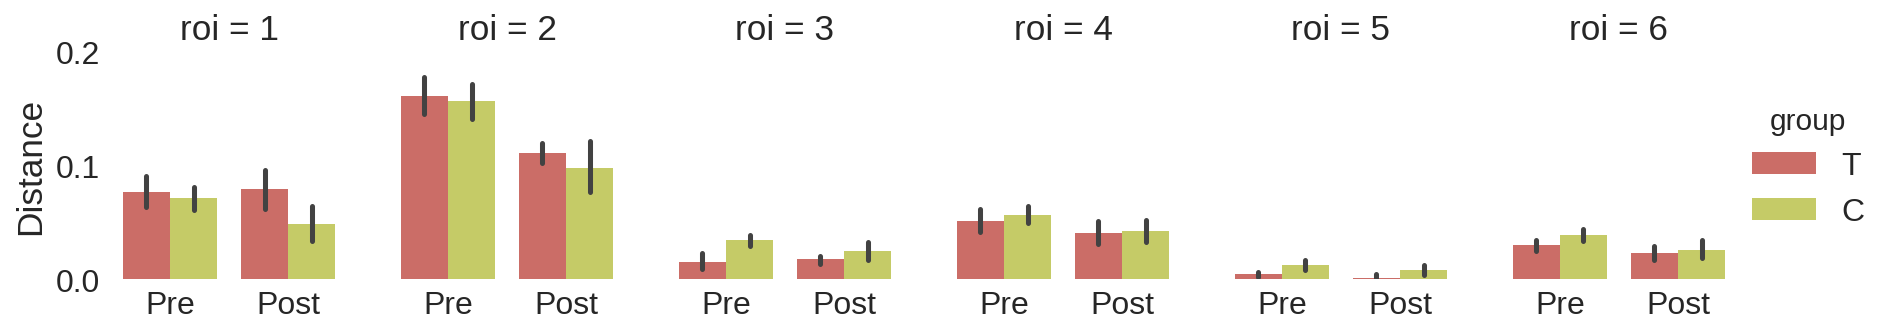

In [31]:
fig, ax = plt.subplots(nrows=2,ncols=1)

plt.subplot(2,1,1)
distances = pd.read_csv('/home/beukema2/Dropbox/r2d4/figures/distance_pre_post.csv', header=None)
distances.columns = ['distance','pre_post','group', 'roi', 'reactionTimes']
di = {1:'T', 2:'C'}
distances = distances.replace({'group':di})
colors = {'T': "#ef8d23",'C': "#1726d3"}
g = sns.factorplot(y='distance', x='pre_post',col='roi', hue='group',data=distances,ci=68,  kind="bar", size=3, aspect=.7)
(g.set_axis_labels("", r'Distance').set_xticklabels(["Pre", "Post"]).set(ylim=(-.0, .2)))


plt.subplot(2,1,2)
distances = pd.read_csv('/home/beukema2/Dropbox/r2d4/figures/distance_pre_post.csv', header=None)
distances.columns = ['distance','pre_post','group', 'roi', 'reactionTimes']
di = {1:'T', 2:'C'}
distances = distances.replace({'group':di})
colors = {'T': "#ef8d23",'C': "#1726d3"}
g = sns.factorplot(y='distance', x='pre_post',col='roi', hue='group',data=distances,ci=68,  kind="bar", size=3, aspect=.7)
(g.set_axis_labels("", r'Distance').set_xticklabels(["Pre", "Post"]).set(ylim=(-.0, .2)))
